# 텍스트를 위한 인공신경망


### 순차 데이터(sequential data)

텍스트나 시계열 데이터(time series data)와 같이 순서에 의미가 있는 데이터.

"I an a man"(O)
"man an a I"(X)

시계열 데이터 ex) 주식 주가( 9:00 50,000원, 9:15 48,950, ...)

텍스트 데이터는 단어의 순서가 매우 중요하다. -> **이전에 입력한 데이터를 기억**

이런 댓글은 긍정적인 평가일까 부정적인 평가일까?

"**별로지만** 추천해요"

만약 여기서 신경망이 순서를 기억하지 못하고 단어by단어로만 평가한다면 "추천해요"를 보고 긍정적 평가로 분류할 것이다. 

완전 연결 신경망이나 합성곱 신경망은 **기억 장치가** 없다. 하나의 샘플(하나의 배치)을 사용하여 정방향 계산을 수행하고 나면 그 샘플은 버려지고 다음 샘플을 처리할 때 재사용하지 않는다.

이렇게 입력 데이터의 흐름이 앞으로만 전달되는 신경망을 **피드포워드 신경망(feedforward neural network)**라고 한다.

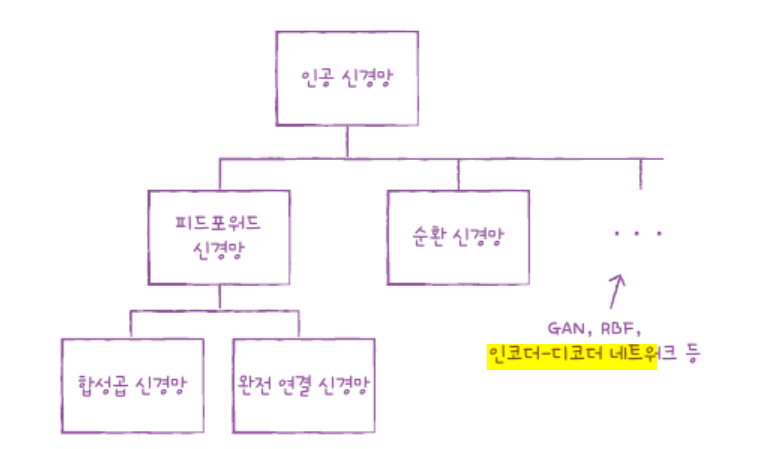

신경망이 '기억'하기 위해선 데이터 흐름이 앞으로만 전달될 것이 아니라 다시 신경망 층에 **순환**될 필요가 있다. 이에 등장한 것이 바로 **순환 신경망**이다.

### **순환 신경망**(recurrent neural network, RNN)

순환 신경망은 완전 연결 신경망에 이전 데이터의 처리 흐름을 순환하는 고리를 추가한 형태이다.

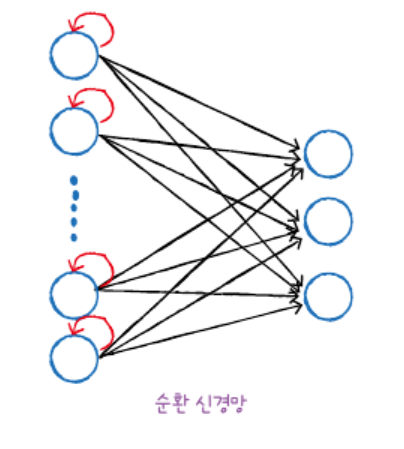

즉, 뉴런의 출력 f(가중합 + 절편)이 다시 입력으로 사용되는 것이다.

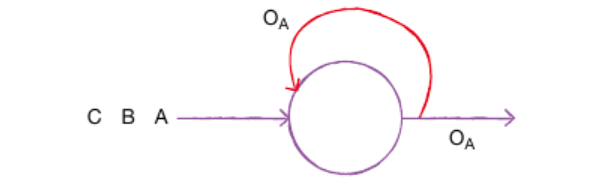

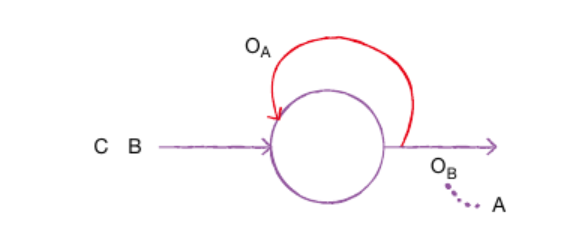

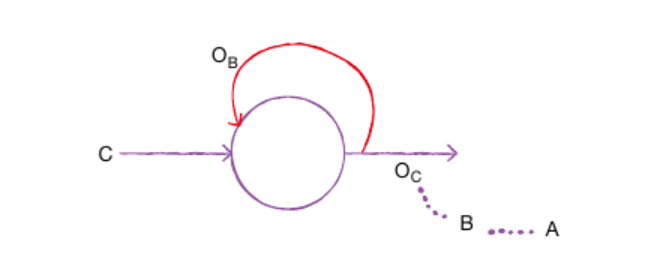

Oc에는 B에 대한 정보와 A에 대한 정보가 어느 정도 포함되어 있다. 다만 A보다는 B에 대한 정보가 더 많을 것이다.

그래서 순환 신경망에서는 **'이전 샘플에 대한 기억을 가지고 있다.'**라고 말한다. 이렇게 샘플을 처리하는 **한 단계를 타임스텝**(timestep)이라고 말한다.

타입스텝이 오래될수록 순환되는 정보는 희미해진다. 

순환 신경망에서는 층을 셀(cell)이라고 부른다. 한 셀에는 여러개의 뉴런이 있지만 뉴런을 다 표시하지 않고 하나의 셀로 층을 표현한다. 또 셀의 출력을 **은닉 상태(hidden state)**라고 부른다.



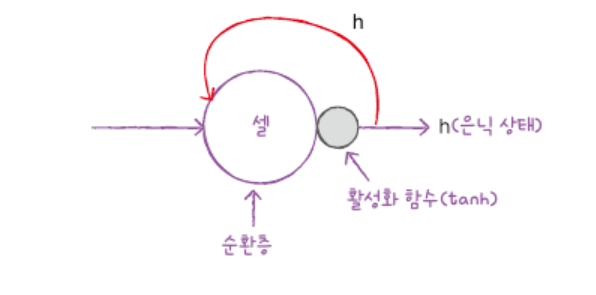

일반적으로 은닉층의 활서화 함수로 하이퍼볼릭 탄젠트(tanh)가 많이 사용된다.

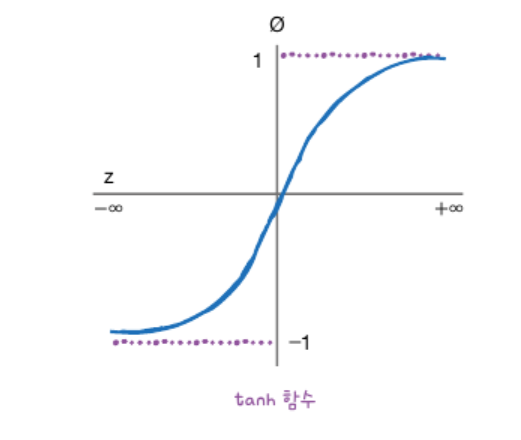

순환 신경망에서도 입력과 가중치를 곱한다. 다만 순환 신경망의 뉴런에는 **가중치가 하나 더** 있다. **바로 이전 타임스텝의 은닉 상태에 곱해지는** 가중치이다. 셀은 입력과 이전 타입스텝의 은닉 상태를 사용하여 현재 타임스텝의 은닉 상태를 만든다.

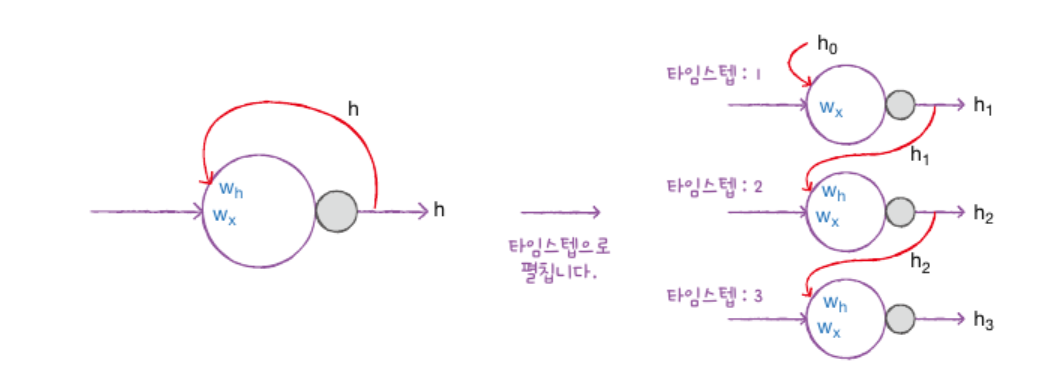

위 그림에서 볼 수 있듯이 모든 타임스텝에서 은닉 상태에 적용되는 가중치는 Wb하나이다. 가중치Wb는 타임스텝에 따라 **변화되는 뉴런의 출력을 학습**한다. 이 능력이 순차 데이터를 다루는 데 필요하다.

맨 처음 타임스텝 1에서는 이전 은닉상태가 없다. 따라서 맨 처음 샘플을 이력할 때는 모두 0으로 초기화하여 입력한다.

### 셀의 가중치

복잡한 모델을 배울수록 가중치 개수를 계산해 보면 잘 이해하고 있는지 알 수 있다.

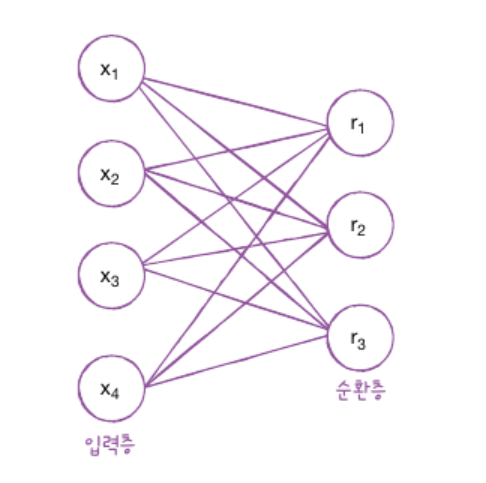

먼저 Wx의 수는 몇 개일까? 각 순환층마다 4개의 입력이 들어오므로 4*3=12일 것이다.



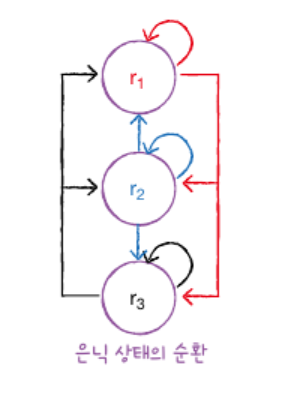

은닉 상태를 위한 가중치 Wb의 크기는 어떨까?

각 뉴런의 은닉 상태가 재사용될 때에도 모든 뉴런에게 전달된다. 즉, 이전 타임스텝의 은닉상태 역시 완전 연결된다.

따라서 총 3(은닉상태 가중치,자기 자신 은닉상태 포함)x3(뉴런수) = 9개이다.

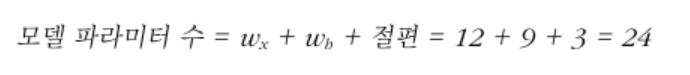

### 입출력

일반적으로 순환층은 샘플마다 2개의 차원을 가진다. 보통 하나의 샘플을 하나의 시퀀스(sequence)라고 한다. 시퀀스 안에는 여러 개의 아이템이 들어있다. 여기에서 시퀀스의 길이가 바로 타임스텝의 길이가 된다.

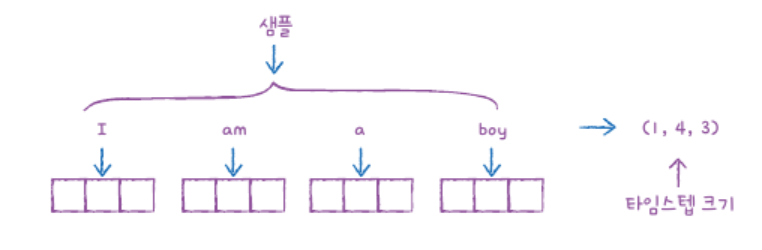

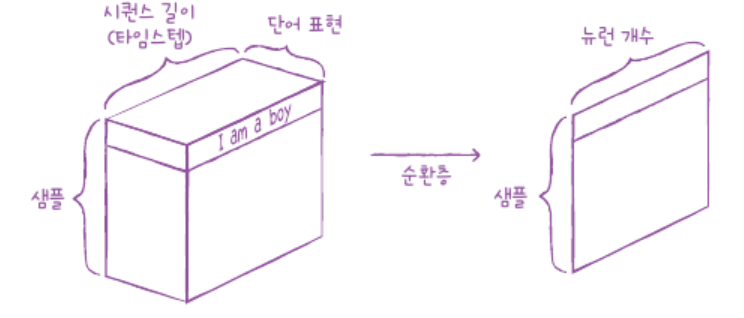

하나의 샘플은 시퀀스 길이(단어의 수), 단어 표현(어휘사전)의 2차원 배열이다. 순환층을 통과하면 1차원 배열로 바뀐다. 이 1차원 배열의 크기는 순환층의 뉴런 개수에 의해 결정된다.

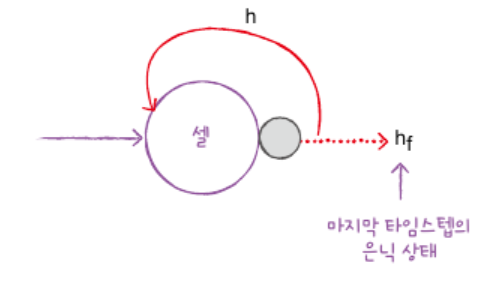

사실 순환층에서 셀의 출력은 기본적으로 마지막 타임스텝의 은닉 상태만 출력으로 내보낸다.

이는 마치 입력된 시퀀스 길이를 모두 읽어서 정보를 마지막 은닉 상태에 압축하여 전달하는 것처럼 볼 수 있다.

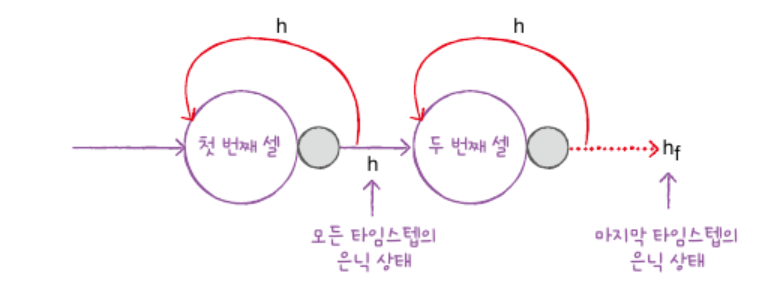

만약 여러개의 순환층을 연결한다면 **마지막 셀을 제외한 다른 모든 셀은 모든 타임스텝의 은닉상태를 출력**한다.

마지막 셀은 마지막 타임스텝의 은닉 상태만 출력한다.

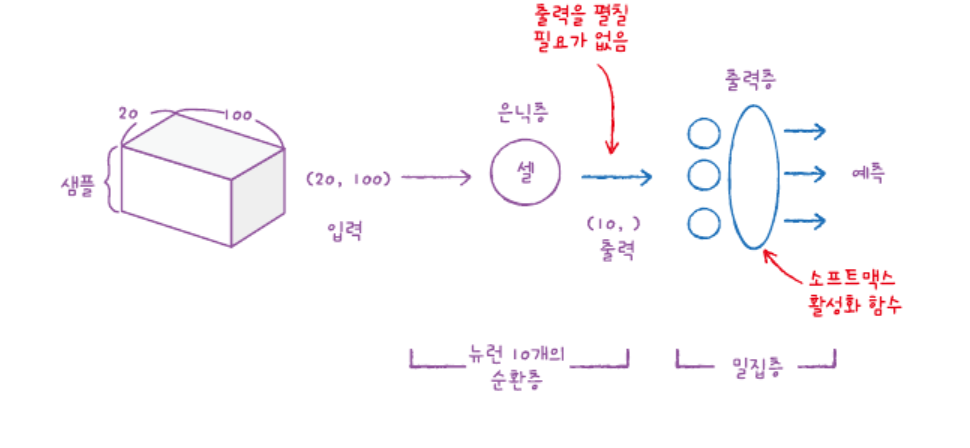

위 그림에서 샘플은 20개의 타임스텝으로 이루어져 있다. 또 각 타입스텝은 100개의 표현 또는 특성으로 이루어져있다. 

이 샘플이 순환층의 셀을 통과하면 모든 타임스텝을 처리하고 난 후의 은닉상태만 출력된다. (뉴런의 수가 10개이므로 10차원의 벡터)